In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv("BUNDESBANK-BBK01_WT5511.csv",index_col=0)
df.head()

,Value
Date,
30-04-1968,39.10
31-05-1968,42.00
30-06-1968,40.95
31-07-1968,38.90
31-08-1968,39.85


In [48]:
y = df['Value']
y_train = y[:571]
y_test = y[571:]
print(y_train.shape ,y_test.shape)

(571,) (6,)


In [49]:
model = auto_arima(y, trace=True, error_action='ignore', 
                   suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5750.249, Time=1.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5759.940, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5756.348, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5755.681, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5759.885, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5758.333, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5758.336, Time=0.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5745.887, Time=1.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5760.322, Time=0.61 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5744.489, Time=1.43 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5761.411, Time=0.67 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=5741.794, Time=2.00 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=5749.444, Time=1.10 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=5738.043, Time=1.92 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept

In [52]:
import numpy as np
forecast = model.predict(n_periods=6)
forecast = pd.DataFrame(forecast,index = np.arange(y.shape[0]+1,y.shape[0]+7),
                        columns=['Prediction'])

forecast

,Prediction
578,NaN
579,NaN
580,NaN
581,NaN
582,NaN
583,NaN


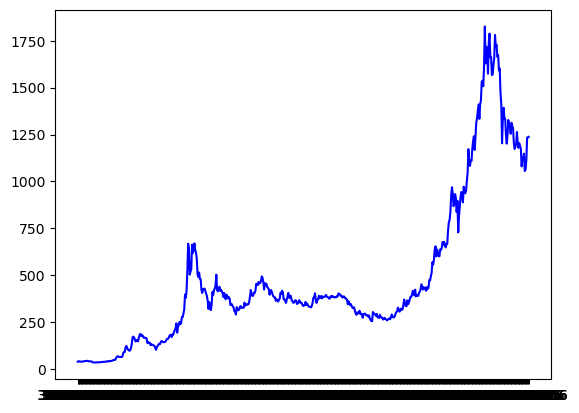

In [53]:
#plot the predictions for validation set
plt.plot(y, label='Train',color="blue")

plt.plot(forecast, label='Prediction',color="purple")
plt.show()

In [54]:
rms = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rms)

Test RMSE: 80.815


# AutoETS


In [39]:
import os
import pandas as pd
#os.chdir("")
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

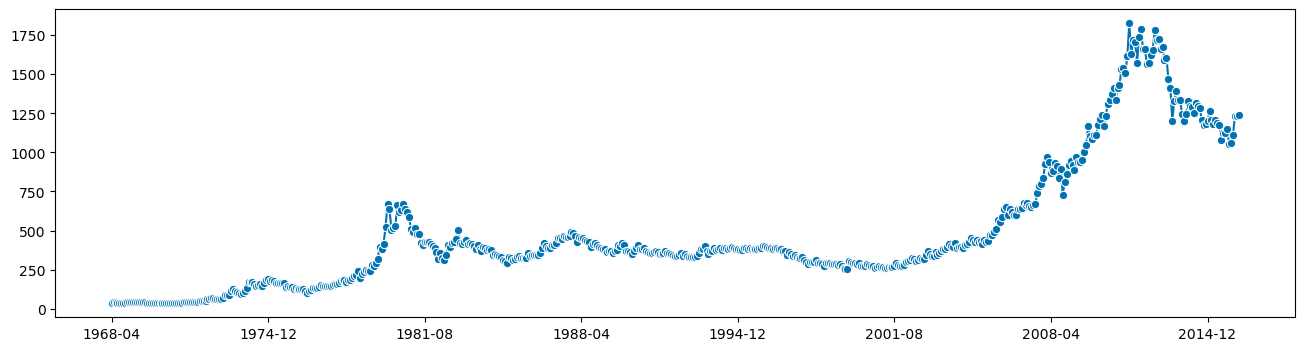

In [40]:
df=pd.read_csv("BUNDESBANK-BBK01_WT5511.csv",index_col=0)
df.head()
idx=pd.to_datetime(df.index).to_period("M")
df.index = idx
plot_series(df)

(571,) (6,)


ForecastingHorizon(['2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04'], dtype='period[M]', is_relative=False)

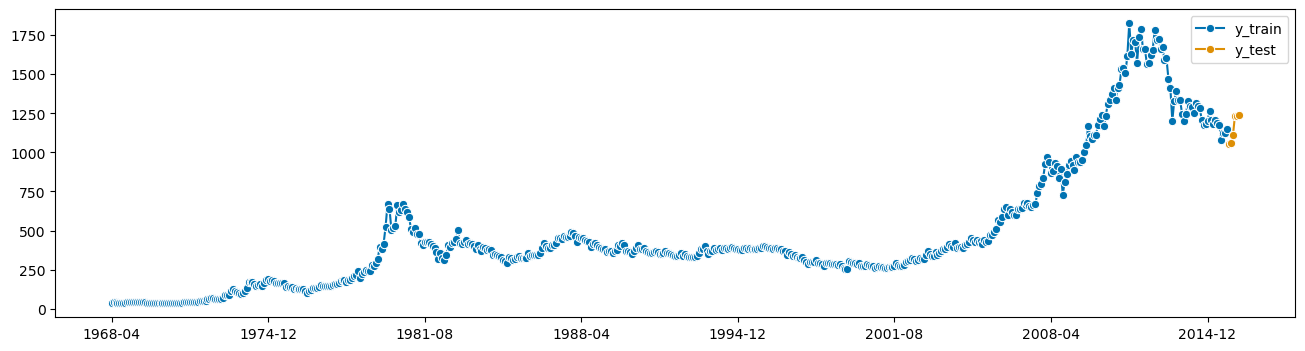

In [41]:
y=df["Value"]
y_train,y_test =temporal_train_test_split(y,test_size=6)
print(y_train.shape,y_test.shape)
plot_series(y_train,y_test,labels=["y_train","y_test"])
fh=ForecastingHorizon(y_test.index,is_relative=False)
fh

In [42]:
forecaster=AutoETS(auto=True,sp=12)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  571
Model:                       ETS(MAN)   Log Likelihood               -2495.091
Date:                Fri, 17 Nov 2023   AIC                           5000.182
Time:                        09:31:53   BIC                           5021.919
Sample:                    04-30-1968   HQIC                          5008.662
                         - 10-31-2015   Scale                            0.003
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.044     22.496      0.000       0.913       1.087
smoothing_trend     0.0492      0.019      2.538      0.011       0.011       0.087
initial_level      38.7965      

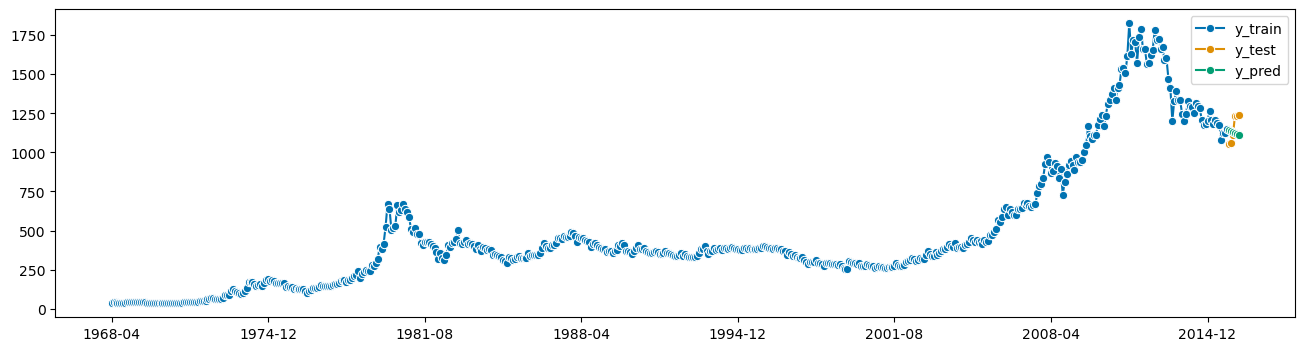

In [43]:
y_pred=forecaster.predict(fh)
plot_series(y_train,y_test,y_pred,labels=["y_train","y_test","y_pred"])
plt.show()

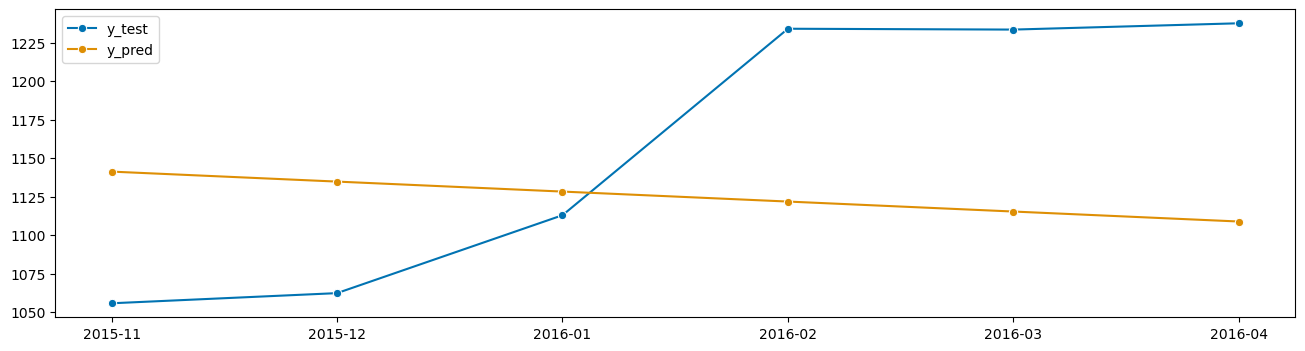

In [44]:
plot_series(y_test,y_pred,labels=["y_test","y_pred"])
plt.show()

In [45]:
mean_squared_error(y_test,y_pred,square_root=True)

96.65908647446109